## Causal Inference using Infant Health and Development Program (idhp) and implementing `Propensity Score Matching` from scratch.

In [2]:
!pip install dowhy
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


In [25]:
data = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv", header = None)
col =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1" ,]
for i in range(1,26):
    col.append("x"+str(i))
data.columns = col
data = data.astype({"treatment":'bool'}, copy=False)
data.head()

,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,True,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,False,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


treatment : Given treatment.

y_factual : Observed outcome. \
y_cfactual : Potential outcome given the opposite treatment.

mu0 : Control conditional means.

mu1 : Treated conditional means.

X1 ~ X6 : Confounders with continuous values.

X7 ~ X25 : Confounders with binary values.

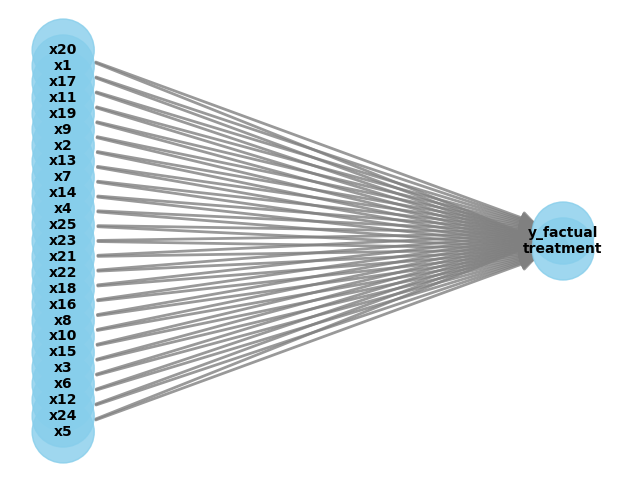

In [7]:
model=CausalModel(
        data = data,
        treatment='treatment',
        outcome='y_factual',
        common_causes=["x"+str(i) for  i in range(1,26)]
        )
model.view_model()

In [8]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True, method_name="maximal-adjustment")
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                                             ↪
────────────(E[y_factual|x5,x24,x12,x6,x3,x15,x10,x8,x16,x18,x22,x21,x23,x25,x4,x14,x7,x13,x2,x9,x ↪
d[treatment]                                                                                       ↪

↪                    
↪ 19,x11,x17,x1,x20])
↪                    
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x5,x24,x12,x6,x3,x15,x10,x8,x16,x18,x22,x21,x23,x25,x4,x14,x7,x13,x2,x9,x19,x11,x17,x1,x20,U) = P(y_factual|treatment,x5,x24,x12,x6,x3,x15,x10,x8,x16,x18,x22,x21,x23,x25,x4,x14,x7,x13,x2,x9,x19,x11,x17,x1,x20)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [9]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                                             ↪
────────────(E[y_factual|x5,x24,x12,x6,x3,x15,x10,x8,x16,x18,x22,x21,x23,x25,x4,x14,x7,x13,x2,x9,x ↪
d[treatment]                                                                                       ↪

↪                    
↪ 19,x11,x17,x1,x20])
↪                    
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x5,x24,x12,x6,x3,x15,x10,x8,x16,x18,x22,x21,x23,x25,x4,x14,x7,x13,x2,x9,x19,x11,x17,x1,x20,U) = P(y_factual|treatment,x5,x24,x12,x6,x3,x15,x10,x8,x16,x18,x22,x21,x23,x25,x4,x14,x7,x13,x2,x9,x19,x11,x17,x1,x20)

## Realized estimand
b: y_factual~treatment+x5+x24+x12+x6+x3+x15+x10+x8+x16+x18+x22+x21+x23+x25+x4+x14+x7+x13+x2+x9+x19+x11+x17+x1+x20
Target units: ate

## Esti

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [10]:
print("Causal Estimate is " + str(estimate.value))
data_1 = data[data["treatment"]==1]
data_0 = data[data["treatment"]==0]

print("ATE", np.mean(data_1["y_factual"])- np.mean(data_0["y_factual"]))

Causal Estimate is 3.9286717508727134
ATE 4.021121012430829


In [11]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching"
)

print("Causal Estimate is " + str(estimate.value))

print("ATE", np.mean(data_1["y_factual"])- np.mean(data_0["y_factual"]))

Causal Estimate is 3.9727311622191595
ATE 4.021121012430829


### Propensity Score Matching without any Library

In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [50]:
class PropensityScoreEstimator:
    def __init__(self, treatment_column, outcome_column, confounders_columns):
        self.treatment_col = treatment_column
        self.outcome_col = outcome_column
        self.confounder_cols = confounders_columns
        self.model = LogisticRegression()
        self.propensity_scores = None

    def fit(self, data):
        X = data[self.confounder_cols]
        # treatment
        T = data[self.treatment_col]

        self.model.fit(X, T)
        self.propensity_scores = self.model.predict_proba(X)[:, 1]
        data['propensity_score'] = self.propensity_scores

        return data

    def match(self, data):
        """
        Matching based on propensity scores
        """
        treated = data[data[self.treatment_col]==1]
        print(f'Treated shape: {treated.shape}')
        control = data[data[self.treatment_col]==0]
        print(f'Control shape: {control.shape}')
        matched_control = []
        for _, treated_row in treated.iterrows():
            # taking control row with closest propensity score to treated row
            control_row = control.loc[(control['propensity_score'] - treated_row['propensity_score']).abs().idxmin()]
            matched_control.append(control_row)

        matched_control = pd.DataFrame(matched_control)
        matched_data = pd.concat([treated, matched_control])
        return matched_data

    def estimate_effect(self, data):
        treated = data[data[self.treatment_col]==1]
        control = data[data[self.treatment_col]==0]

        treated_mean = treated[self.outcome_col].mean()
        control_mean = control[self.outcome_col].mean()
        return treated_mean - control_mean

In [51]:
estimator = PropensityScoreEstimator(treatment_column='treatment', outcome_column='y_factual', confounders_columns=["x"+str(i) for  i in range(1,26)])
estimator

In [52]:
df = estimator.fit(data)
df.head()

,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,propensity_score
0,True,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,0,0,0,0,0,0,0.283505
1,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,0,0,0,0,0,0,0.068051
2,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,0,1,1,0,0,0,0,0,0,0.107717
3,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,0,1,1,0,0,0,0,0,0,0.129523
4,False,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,0,0,0,0,0,0,0.092541


In [53]:
# matching
matched_data = estimator.match(df)
matched_data.head(), matched_data.shape

Treated shape: (139, 31)
Control shape: (608, 31)


(    treatment  y_factual  y_cfactual       mu0       mu1        x1        x2  \
 0        True   5.599916    4.318780  3.268256  6.854457 -0.528603 -0.343455   
 18       True   5.855671    1.856800  2.271710  6.490733  1.138001  0.996346   
 22       True   5.042680    2.361597  2.527388  6.597386  1.310930  1.396110   
 26       True   9.066118    1.996652  1.685048  6.191994 -0.059533 -0.602710   
 41       True   6.255480    1.218525  1.421080  6.021617 -1.931490 -1.802002   
 
           x3        x4        x5  ...  x17  x18  x19  x20  x21  x22  x23  x24  \
 0   1.128554  0.161703 -0.316603  ...    1    1    1    0    0    0    0    0   
 18  0.756191  0.161703 -0.629189  ...    1    1    1    0    0    0    0    0   
 22 -1.477987  1.203011 -0.566672  ...    0    1    1    0    0    0    0    0   
 26 -0.360898  0.161703 -1.004292  ...    1    1    1    0    0    0    0    0   
 41  1.873280 -0.879606 -0.941775  ...    1    1    1    0    0    0    0    0   
 
     x25  propensi

In [54]:
139+139

278

In [55]:
# resetting index for comparison
matched_data = matched_data.reset_index(drop=True)
matched_data.loc[:10, ['treatment', 'propensity_score']], matched_data.loc[139:149, ['treatment','propensity_score']]

(    treatment  propensity_score
 0        True          0.283505
 1        True          0.384901
 2        True          0.193826
 3        True          0.148772
 4        True          0.250104
 5        True          0.261983
 6        True          0.397502
 7        True          0.294812
 8        True          0.313803
 9        True          0.216561
 10       True          0.372030,
      treatment  propensity_score
 139      False          0.283852
 140      False          0.386586
 141      False          0.193130
 142      False          0.148661
 143      False          0.250034
 144      False          0.261326
 145      False          0.397234
 146      False          0.294418
 147      False          0.314890
 148      False          0.215597
 149      False          0.371954)

Here, we can see that the closest propensity rows of control and group are matched. Index 138 is the last treated group, and 139 is the first control row. Hence, comparing them with the gap of 139 indices in between since they are concatenated.

In [56]:
matched_data_clean = estimator.match(df)
effect = estimator.estimate_effect(matched_data_clean)
effect

Treated shape: (139, 31)
Control shape: (608, 31)


3.776835264250377

Thus, we obtain effect of 3.77 of `Treatment(treatment)` on the `outcome(y_factual)` using propensity score matching technique.